In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('Copper.csv')

In [4]:
df.shape

(181673, 14)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [9]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

CONVERTING DATAFRAME
    
*   NUMERIC
*   DATETIME


DATA PREPROCESSING
    Handling missing values
    Detecting and Treating outliers / skewness
    Normalizing data
    Feature selection

In [10]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [11]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [12]:
df=df.drop(['id'],axis=1)


In [13]:
#fill mean for number values
columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
column_means = df[columns_fill_mean].mean()
df[columns_fill_mean] = df[columns_fill_mean].fillna(column_means)

#fill mode for non-number values
columns_fill_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
columns_modes = df[columns_fill_mode].mode().iloc[0]
df[columns_fill_mode] = df[columns_fill_mode].fillna(columns_modes)

In [14]:
df.isna().sum()


item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
df['country'] = df['country'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  int64  
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181673 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


In [16]:
df.dtypes

item_date         object
quantity tons    float64
customer         float64
country            int64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874926e+03,2.349075e+06,-2000.00,1.097037e+01,3.036499e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489812e+01,2.440579e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561375e+01,1.775391e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564827e+00,6.572303e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918036e+03,3.317947e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [18]:
df.shape

(181673, 13)

EXPLORATORY DATA ANALYSIS
TO VISUALIZE OUTLIERS AND SKEWNESS

BEFORE TREATING OUTLIERS AND SKEWNESS

In [19]:
df1 = df.copy()
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [20]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

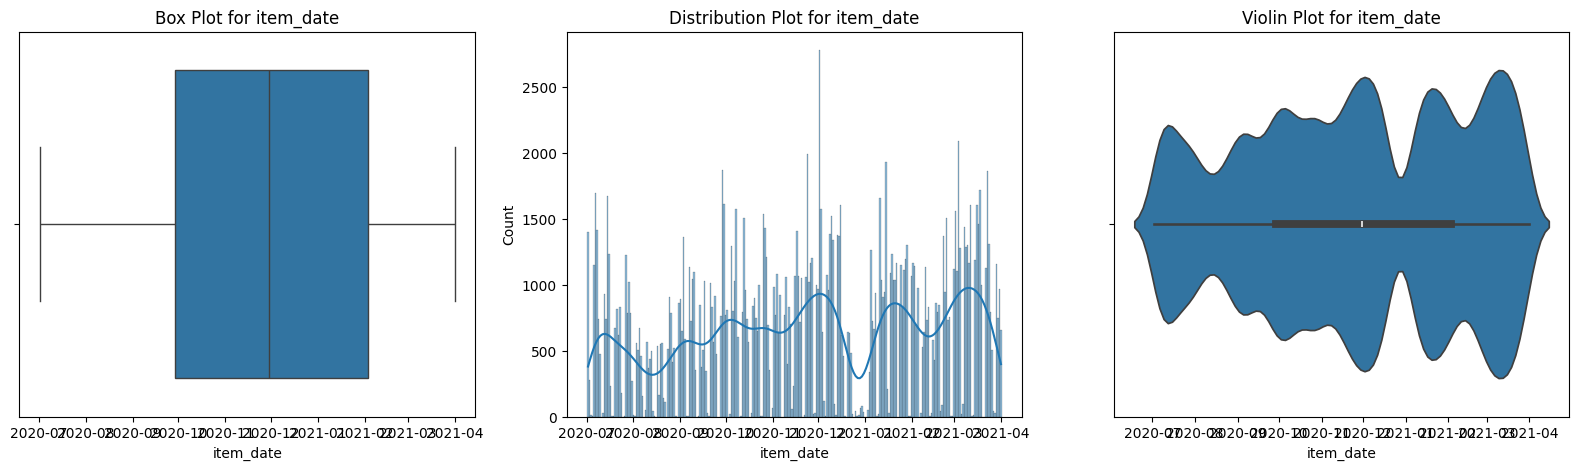

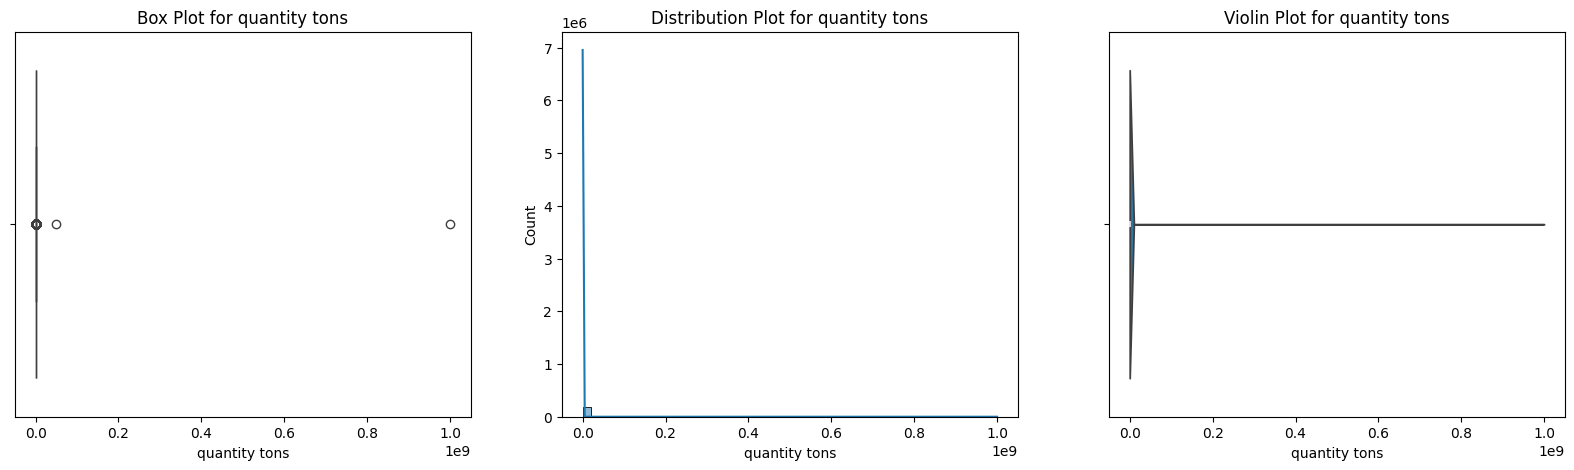

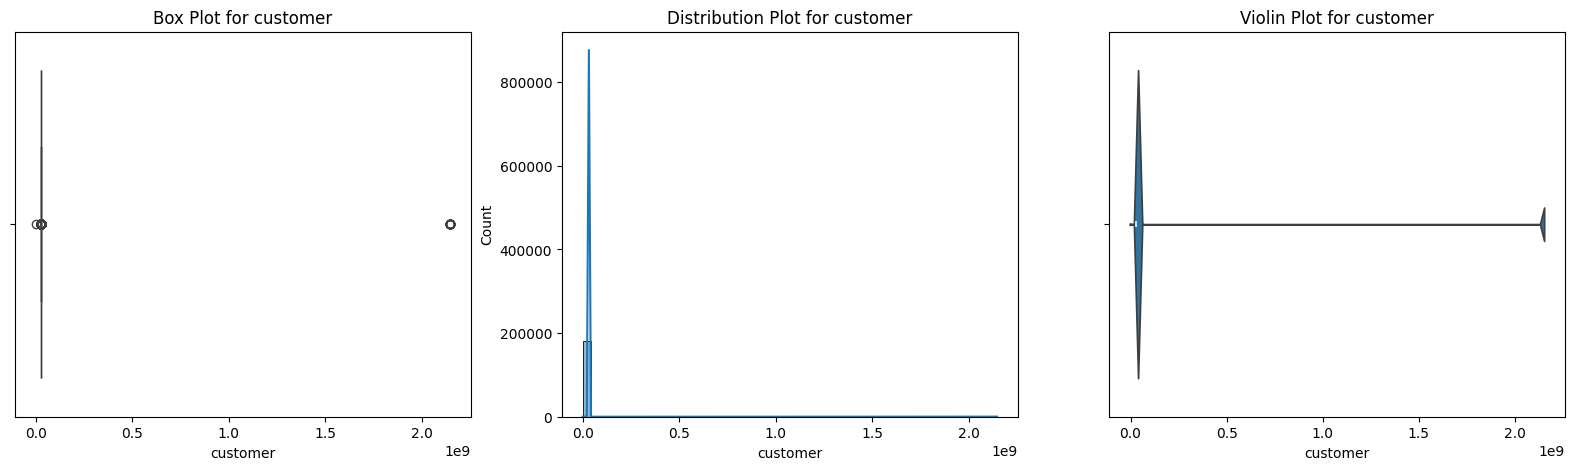

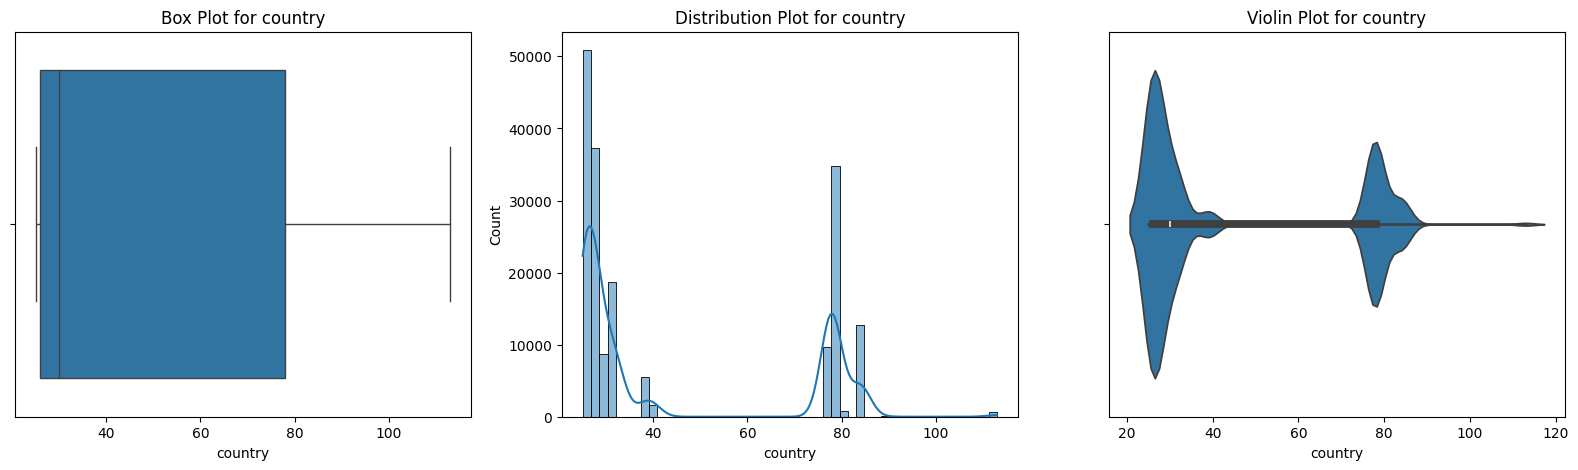

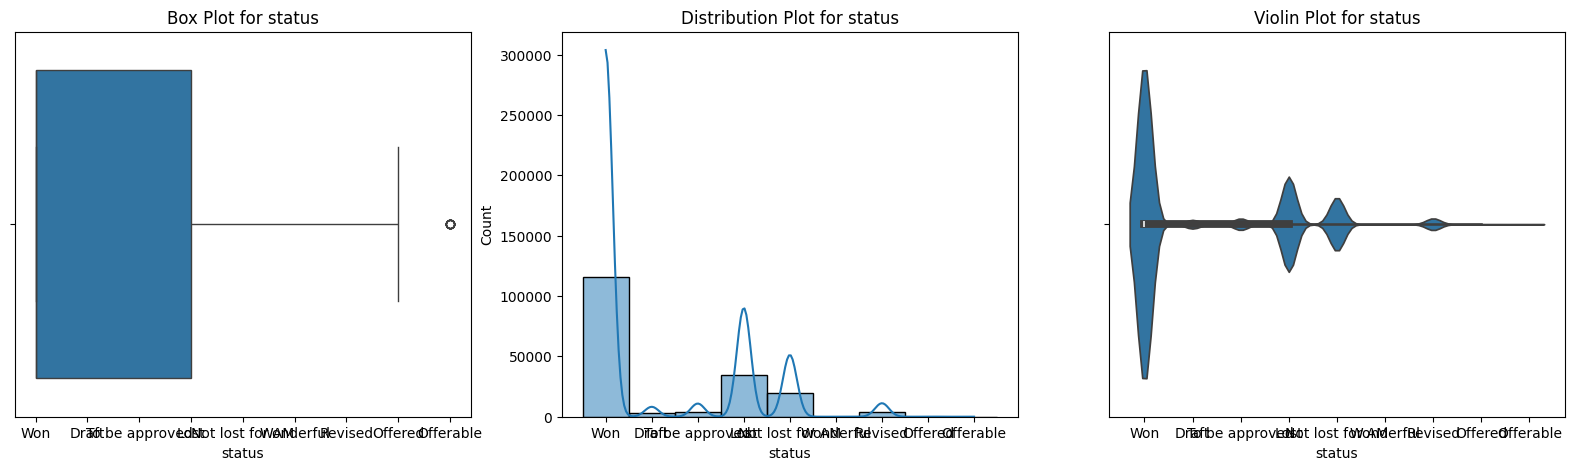

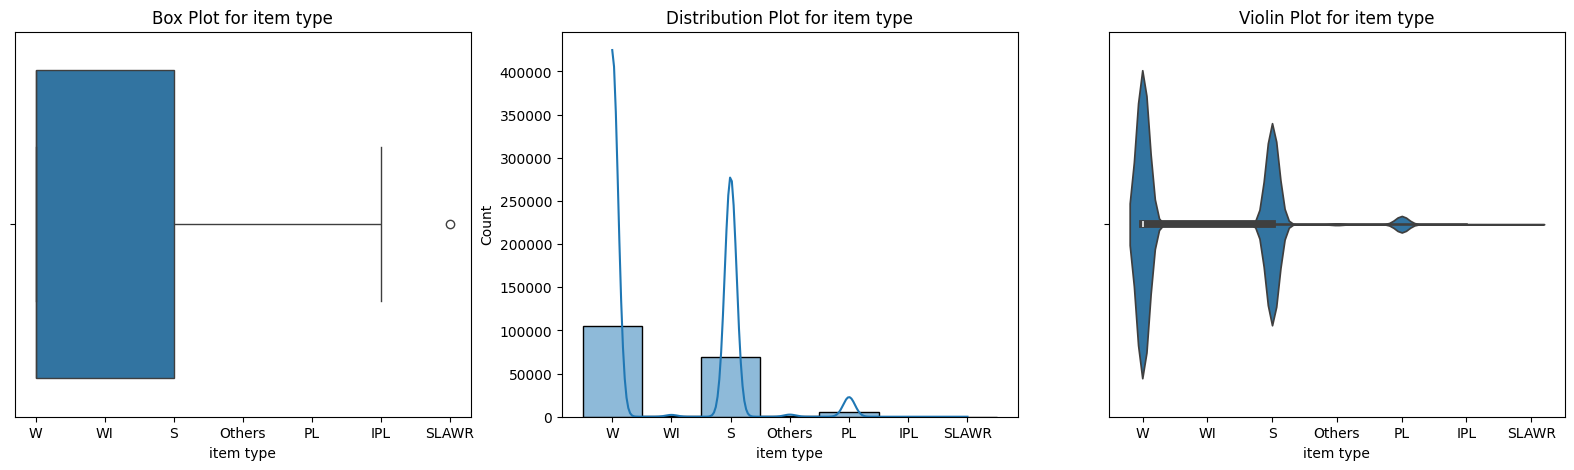

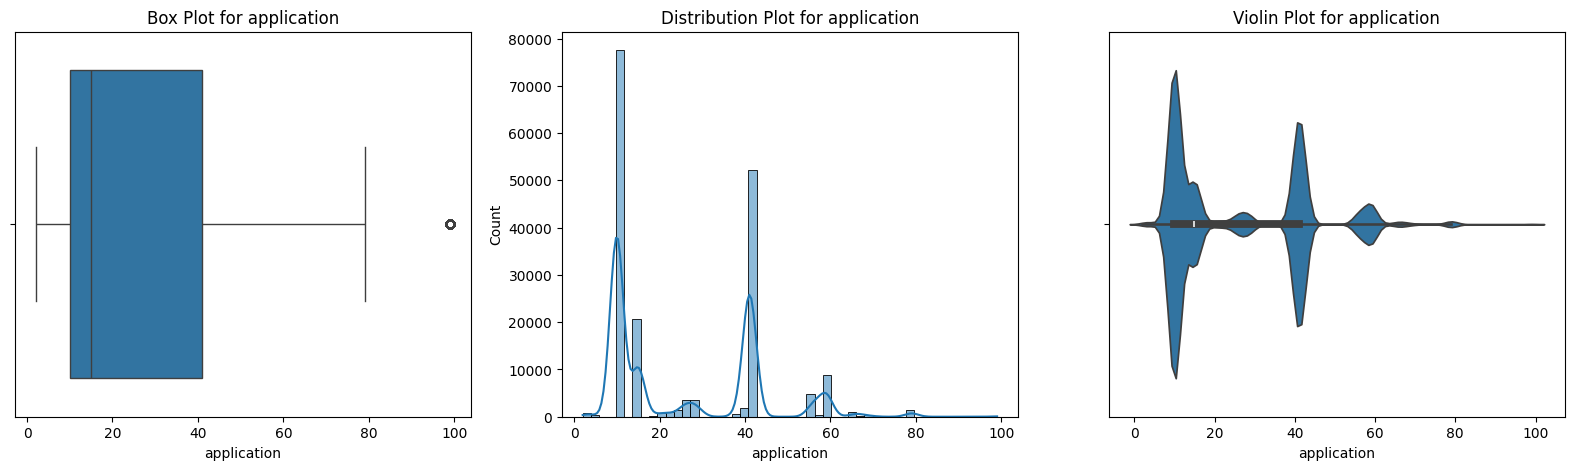

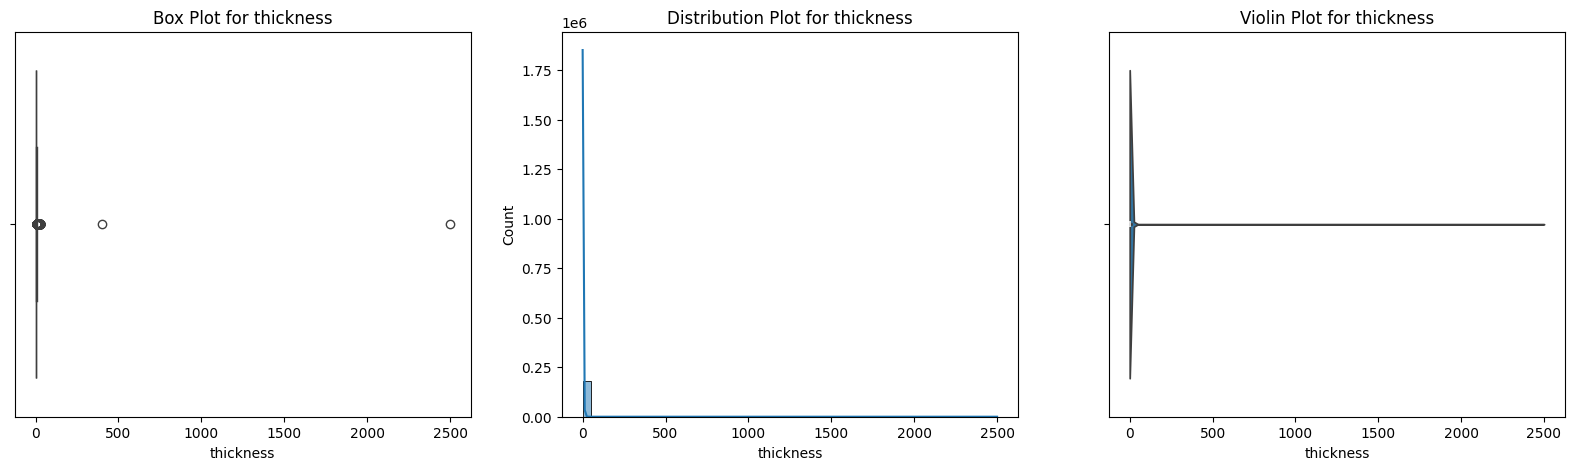

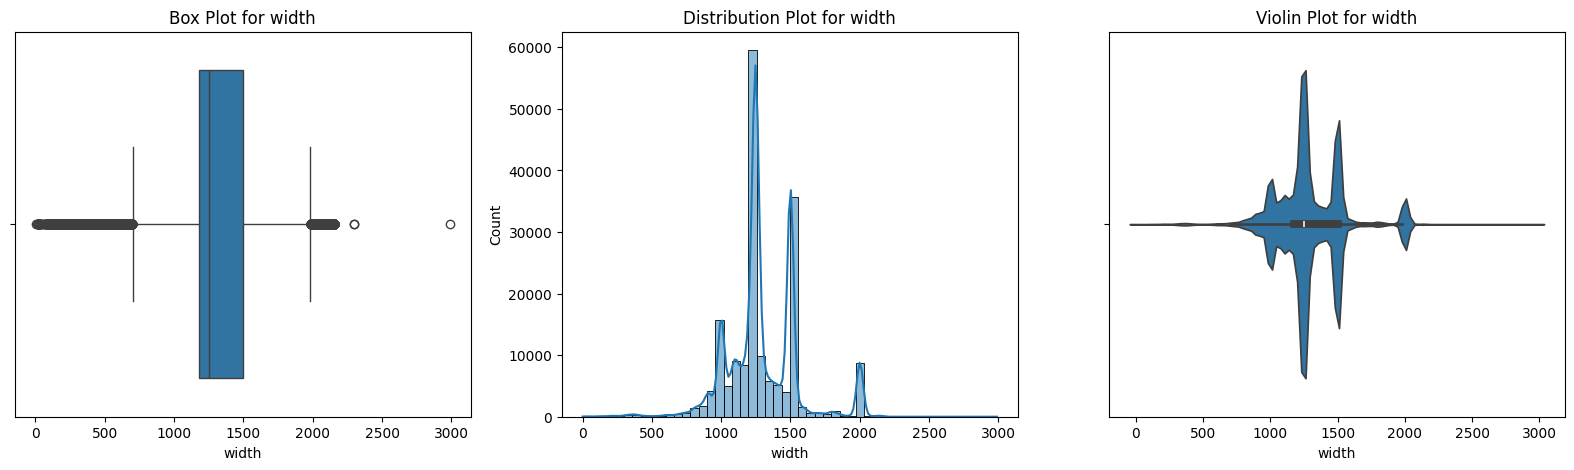

In [21]:
for i in df1:
    plot(df1, i)

In [ ]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (df1[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    df1.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
width : 0 
selling_price : 7 


In [ ]:

df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


In [ ]:
df1.isna().sum()


item_date            0
quantity tons        4
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        7
quantity tons_log    4
thickness_log        0
selling_price_log    7
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()

item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
quantity tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

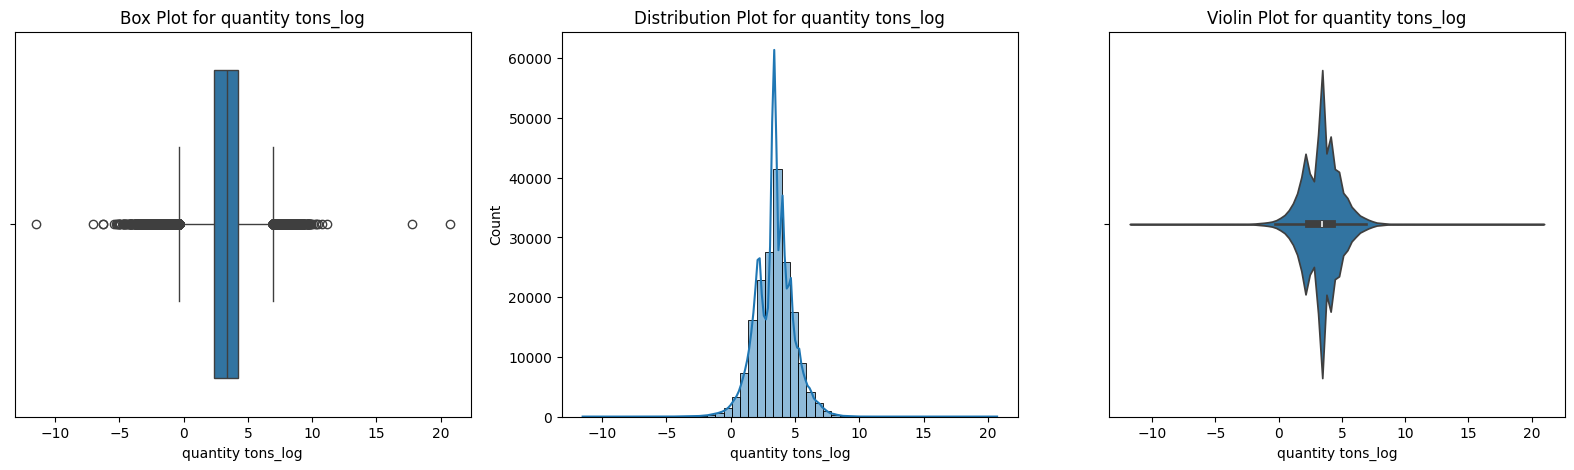

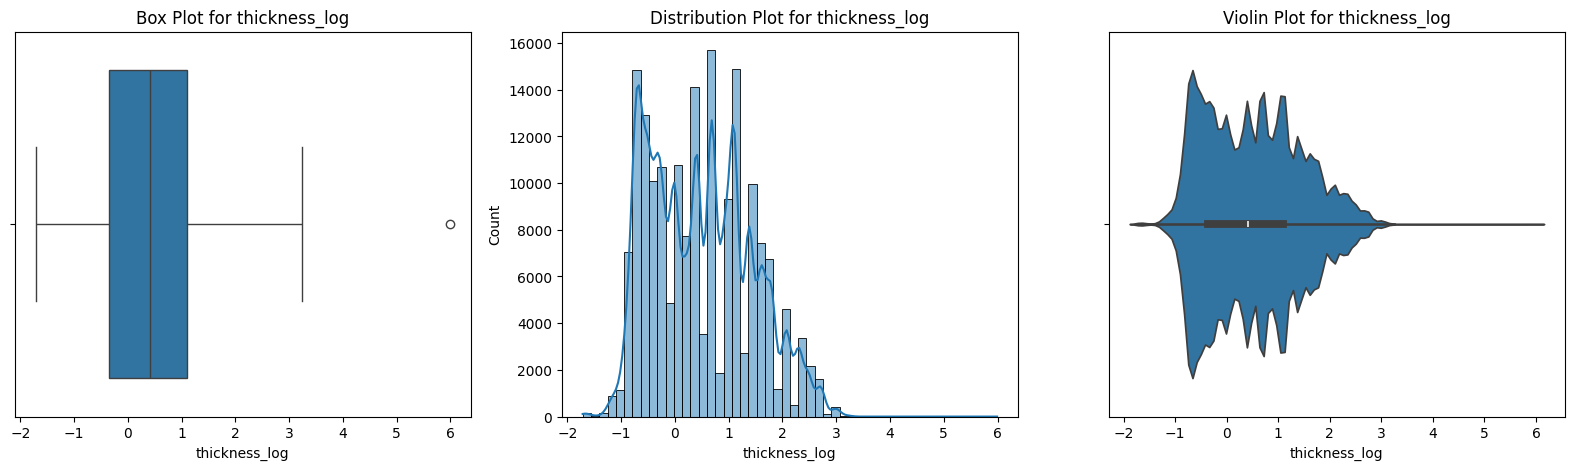

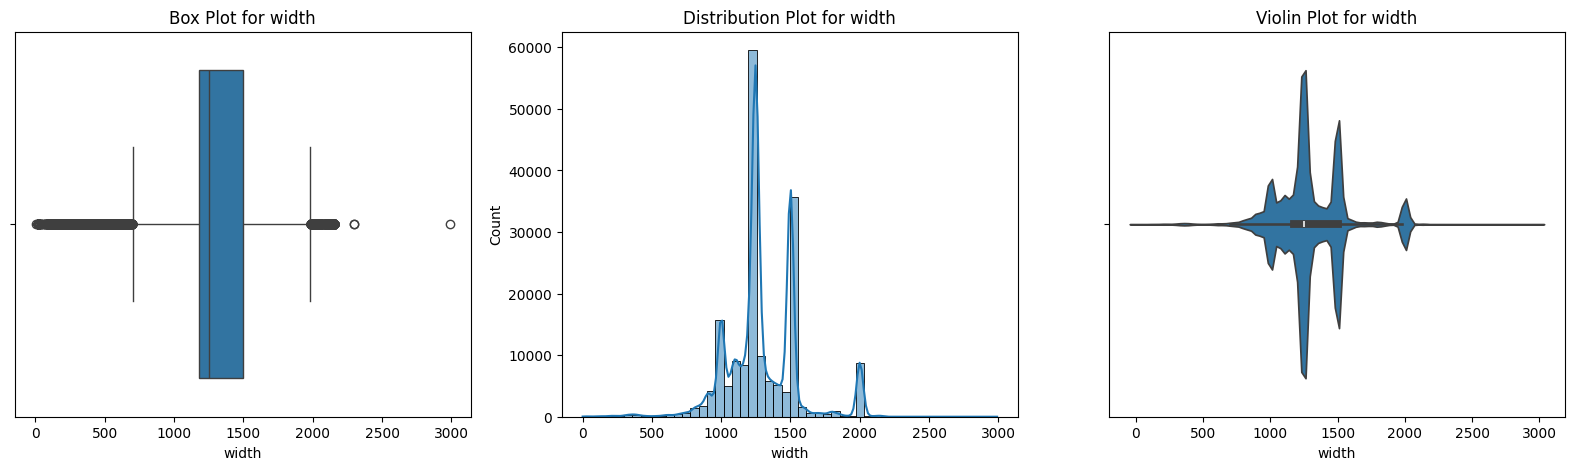

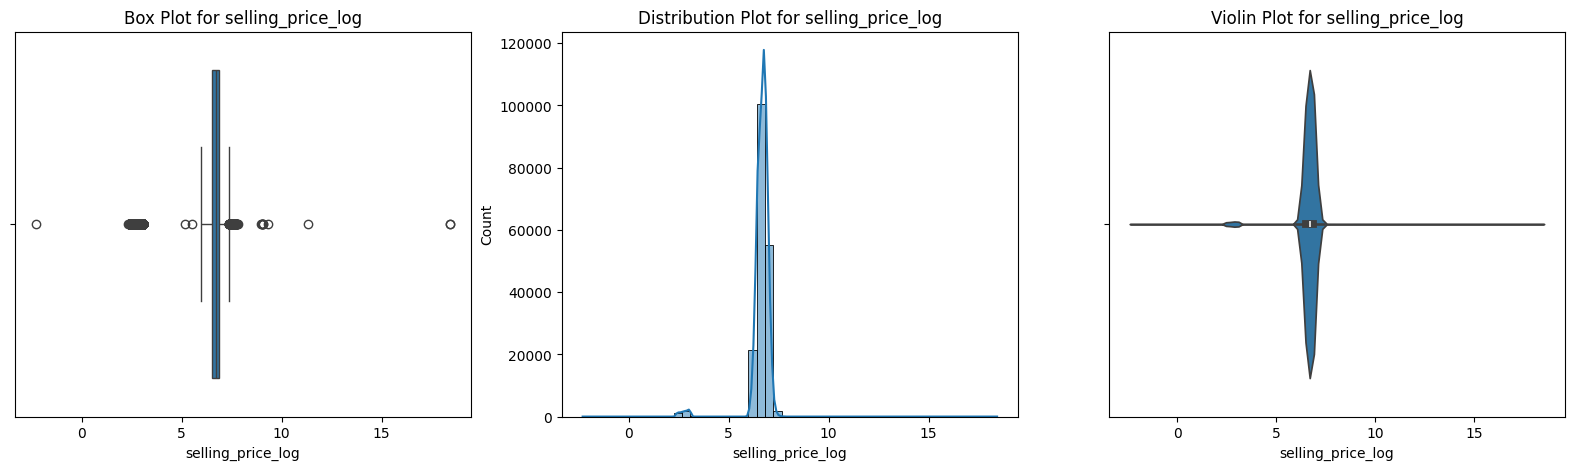

In [ ]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [ ]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Calculate skewness
skewness = numeric_df.skew()

print(skewness)

quantity tons        424.677959
customer              86.982674
country                0.753023
application            0.724614
thickness             15.291371
width                  0.374564
product_ref            1.015276
selling_price        301.378964
quantity tons_log     -0.068548
thickness_log          0.349017
selling_price_log     -5.335279
dtype: float64


In [ ]:
df2 = numeric_df.copy()

In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = df2[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = df2[column].quantile(0.30)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

# Calculate summary statistics after removing outliers
after_stats = df2[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875291e+03       2.551133    1295.289042   1.918156e+03
std     2.349146e+06       2.977116     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036501e+01       1.500000    1250.000000   8.120000e+02
75%     6.716141e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  132631.000000  132631.000000  132631.000000  132631.000000
mean       35.586278       1.803089    1265.155654     841.050729
std        31.885531       1.441616     174.815790     189.197046
min         0.000010       0.180000     855.000000  

<function matplotlib.pyplot.show(close=None, block=None)>

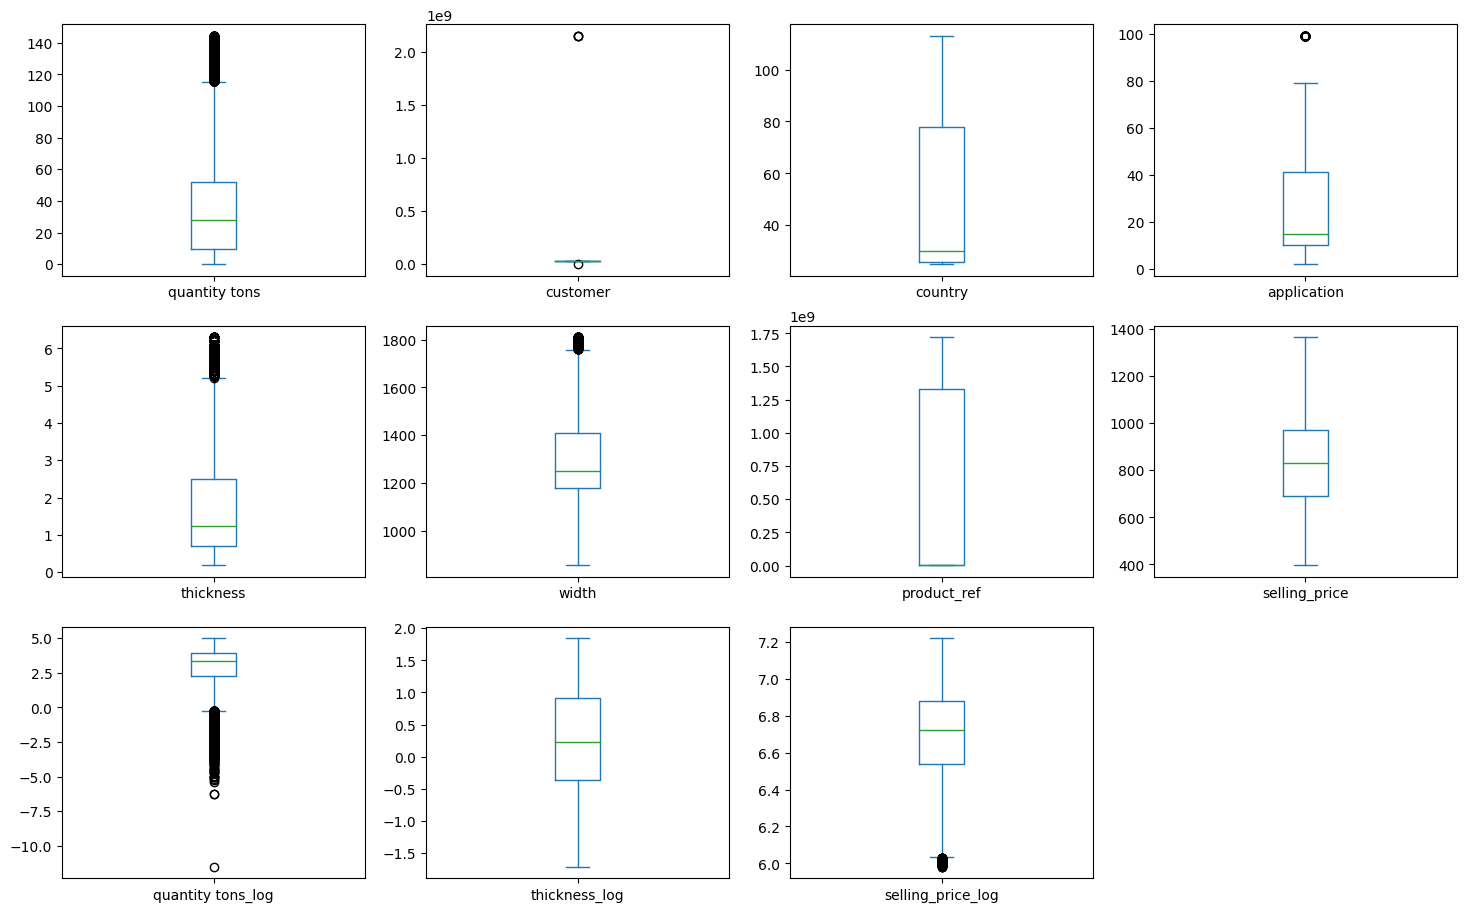

In [ ]:
df2.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

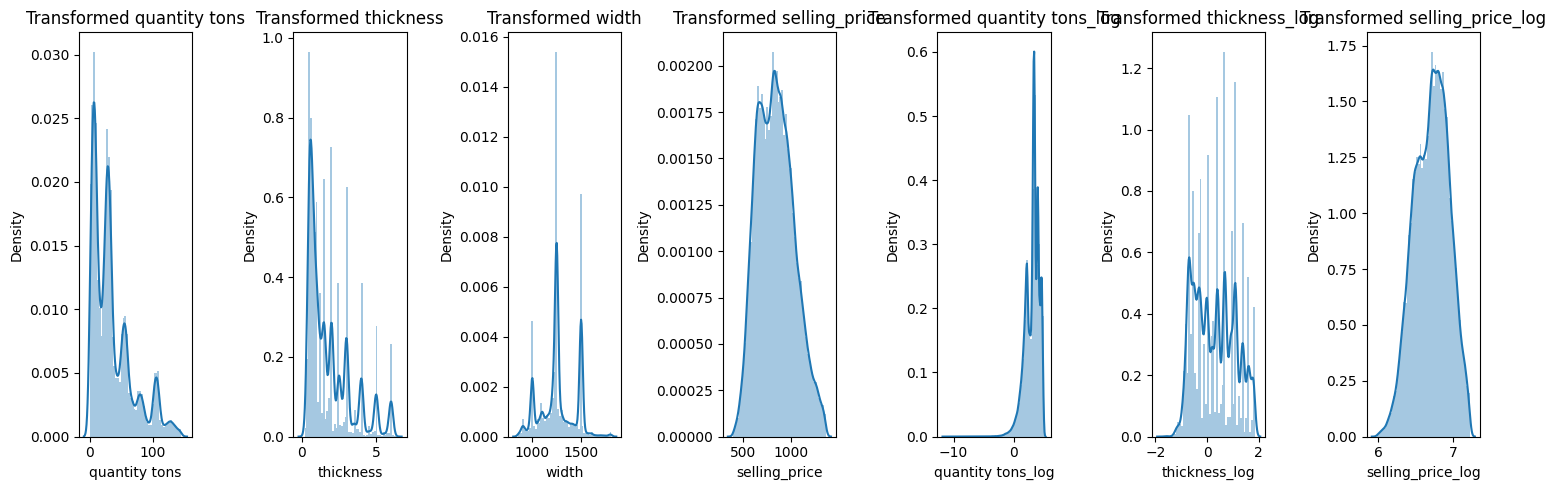

In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price','quantity tons_log', 'thickness_log', 'selling_price_log']


# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 7,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(df2[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
df2 = df2.select_dtypes(include=['float64', 'int64'])

# Calculate skewness
skewness = df2.skew()

print(skewness)

quantity tons          1.239223
customer             210.220811
country                0.700979
application            0.684824
thickness              1.276129
width                  0.057992
product_ref            0.983758
selling_price          0.310072
quantity tons_log     -0.988651
thickness_log          0.201841
selling_price_log     -0.177170
dtype: float64


Here we notice that the normal columns and outlier columns are skewed. So depends on the target variable, we can drop the columns needed.

Here are some guidelines for interpreting skewness values:

Skewness value close to 0: The distribution is approximately symmetrical.
Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
Skewness value less than -1 or greater than 1: The distribution is highly skewed.

FEATURE ENGINEERING
Lable encoding
Feature selection
Standardize / normalize data

In [ ]:
df3 = pd.concat([df1, df2], axis=0)
df3 = df3.drop_duplicates()

df3.reset_index(drop=True, inplace=True)

desired_count = 132631

# Sample adjustment method: Select first 'desired_count' rows from the DataFrame
df3_adjusted = df3.head(desired_count)

# Check the information of the adjusted DataFrame
print(df3_adjusted.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132631 entries, 0 to 132630
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_date          132631 non-null  object 
 1   quantity tons      132631 non-null  float64
 2   customer           132631 non-null  float64
 3   country            132631 non-null  int64  
 4   status             132631 non-null  object 
 5   item type          132631 non-null  object 
 6   application        132631 non-null  float64
 7   thickness          132631 non-null  float64
 8   width              132631 non-null  float64
 9   material_ref       132631 non-null  object 
 10  product_ref        132631 non-null  int64  
 11  delivery date      132631 non-null  object 
 12  selling_price      132631 non-null  float64
 13  quantity tons_log  132631 non-null  float64
 14  thickness_log      132631 non-null  float64
 15  selling_price_log  132631 non-null  float64
dtypes:

In [ ]:
df3 = df3_adjusted.copy()
df3.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


In [ ]:
df3['item_date'] = pd.to_datetime(df3['item_date'])
df3['delivery date'] = pd.to_datetime(df3['delivery date'])

df3['delivery_time_taken']=(df3['item_date']-df3['delivery date']).abs().dt.days
df3.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31


In [ ]:
x=df3[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','quantity tons_log','thickness_log'	,'selling_price_log','delivery_time_taken']].corr()


<Axes: >

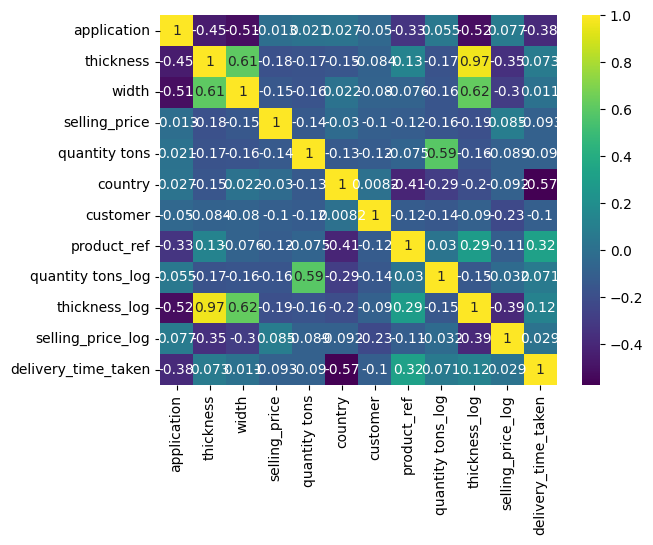

In [ ]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

df_heatmap = x.corr()
sns.heatmap(df_heatmap, annot=True, cmap="viridis")

In [ ]:
df3['country'] = df3['country'].astype(str)
country=df3['country'].unique()
status=df3['status'].unique()
item=df3['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [ ]:
#Use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df3['status_en'] = OE.fit_transform(df3[['status']])
df3['item type_en'] = OE.fit_transform(df3[['item type']])
df3

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken,status_en,item type_en
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132626,2020-10-01,31.180363,30327942.0,84,Revised,W,79.0,1.00,871.0,300346,611993,2020-10-01,1107.00,3.439788,0.000000,7.009409,0,5.0,5.0
132627,2020-10-01,100.109126,30149530.0,26,Not lost for AM,S,3.0,2.50,1420.0,DX51D+Z,164141591,2021-01-01,714.00,4.606261,0.916291,6.570883,92,2.0,3.0
132628,2020-10-01,26.122332,30297329.0,27,Not lost for AM,S,41.0,3.00,1275.0,RCB0KL65H0000000P,640665,2021-01-01,609.00,3.262791,1.098612,6.411818,92,2.0,3.0
132629,2020-10-01,6.369140,30287258.0,27,Won,PL,10.0,1.50,1500.0,2570128466F60MED,640665,2020-10-01,507.00,1.851464,0.405465,6.228511,0,7.0,2.0


In [ ]:
df3.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity tons_log',
       'thickness_log', 'selling_price_log', 'delivery_time_taken',
       'status_en', 'item type_en'],
      dtype='object')

In [ ]:
print(df3['status_en'].unique())
print(df3['item type_en'].unique())

[7. 0. 6. 1. 2. 8. 5. 4. 3.]
[5. 6. 3. 1. 2. 0. 4.]


In [ ]:
item_type_mapping = pd.DataFrame({
    'item type': df3['item type'].unique(),
    'item type_en': df3['item type_en'].unique()
})

item_type_mapping

,item type,item type_en
0,W,5.0
1,WI,6.0
2,S,3.0
3,Others,1.0
4,PL,2.0
5,IPL,0.0
6,SLAWR,4.0


In [ ]:
status_mapping = pd.DataFrame({
    'status': df3['status'].unique(),
    'status_en': df3['status_en'].unique()
})

status_mapping

,status,status_en
0,Won,7.0
1,Draft,0.0
2,To be approved,6.0
3,Lost,1.0
4,Not lost for AM,2.0
5,Wonderful,8.0
6,Revised,5.0
7,Offered,4.0
8,Offerable,3.0


REGRESSION MODEL FOR FINDING SELLING PRICE


In DF, we found that the log columns having more skewed, so using the log columns for regression and classification.(we can drop the unused columns, if needed)

In [ ]:
df3

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken,status_en,item type_en
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132626,2020-10-01,31.180363,30327942.0,84,Revised,W,79.0,1.00,871.0,300346,611993,2020-10-01,1107.00,3.439788,0.000000,7.009409,0,5.0,5.0
132627,2020-10-01,100.109126,30149530.0,26,Not lost for AM,S,3.0,2.50,1420.0,DX51D+Z,164141591,2021-01-01,714.00,4.606261,0.916291,6.570883,92,2.0,3.0
132628,2020-10-01,26.122332,30297329.0,27,Not lost for AM,S,41.0,3.00,1275.0,RCB0KL65H0000000P,640665,2021-01-01,609.00,3.262791,1.098612,6.411818,92,2.0,3.0
132629,2020-10-01,6.369140,30287258.0,27,Won,PL,10.0,1.50,1500.0,2570128466F60MED,640665,2020-10-01,507.00,1.851464,0.405465,6.228511,0,7.0,2.0


In [ ]:
X=df3[['quantity tons_log','status_en','item type_en','application','thickness_log','width','country','customer','product_ref']]
y=df3['selling_price_log']

In [ ]:
X

,quantity tons_log,status_en,item type_en,application,thickness_log,width,country,customer,product_ref
0,3.991779,7.0,5.0,10.0,0.693147,1500.0,28,30156308.0,1670798778
1,6.643822,7.0,5.0,41.0,-0.223144,1210.0,25,30202938.0,1668701718
2,5.956169,7.0,6.0,28.0,-0.967584,952.0,30,30153963.0,628377
3,5.310301,7.0,3.0,59.0,0.832909,1317.0,32,30349574.0,1668701718
4,6.666354,7.0,5.0,10.0,1.386294,2000.0,28,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
132626,3.439788,5.0,5.0,79.0,0.000000,871.0,84,30327942.0,611993
132627,4.606261,2.0,3.0,3.0,0.916291,1420.0,26,30149530.0,164141591
132628,3.262791,2.0,3.0,41.0,1.098612,1275.0,27,30297329.0,640665
132629,1.851464,7.0,2.0,10.0,0.405465,1500.0,27,30287258.0,640665


In [ ]:
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
132626    7.009409
132627    6.570883
132628    6.411818
132629    6.228511
132630    6.976348
Name: selling_price_log, Length: 132631, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92841, 9)
(39790, 9)
(92841,)
(39790,)


In [ ]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.09120225901647272


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', dt_r2)

Mean squared error: 0.032271107530555405
R-squared: 0.9043849608994535


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', rf_r2)

Mean squared error: 0.02089721557309331
R-squared: 0.9380843039792791


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
gbr_r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', gbr_r2)

Mean squared error: 0.029165541270630774
R-squared: 0.913586344492839


In [ ]:
from sklearn.tree import ExtraTreeRegressor

etr = ExtraTreeRegressor()
etr.fit(X_train, y_train)

y_pred = etr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
etr_r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', etr_r2)

Mean squared error: 0.033716255172782233
R-squared: 0.900103178869297


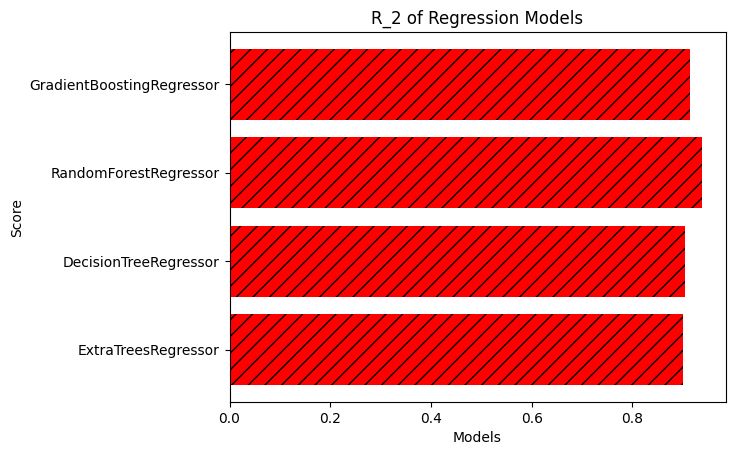

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreesRegressor 0.900103178869297
DecisionTreeRegressor 0.9043849608994535
RandomForestRegressor 0.9380843039792791
GradientBoostingRegressor 0.913586344492839

Model: RandomForestRegressor contain Maximum R2_Score: 0.9380843039792791 


In [ ]:
models = ['ExtraTreesRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor','GradientBoostingRegressor']
score = [etr_r2, dt_r2, rf_r2, gbr_r2]

plt.barh(models, score, color='red',hatch='//')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R_2 of Regression Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

From this observation, RandomForestRegressor model performs well


In [ ]:
X

,quantity tons_log,status_en,item type_en,application,thickness_log,width,country,customer,product_ref
0,3.991779,7.0,5.0,10.0,0.693147,1500.0,28,30156308.0,1670798778
1,6.643822,7.0,5.0,41.0,-0.223144,1210.0,25,30202938.0,1668701718
2,5.956169,7.0,6.0,28.0,-0.967584,952.0,30,30153963.0,628377
3,5.310301,7.0,3.0,59.0,0.832909,1317.0,32,30349574.0,1668701718
4,6.666354,7.0,5.0,10.0,1.386294,2000.0,28,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
132626,3.439788,5.0,5.0,79.0,0.000000,871.0,84,30327942.0,611993
132627,4.606261,2.0,3.0,3.0,0.916291,1420.0,26,30149530.0,164141591
132628,3.262791,2.0,3.0,41.0,1.098612,1275.0,27,30297329.0,640665
132629,1.851464,7.0,2.0,10.0,0.405465,1500.0,27,30287258.0,640665


In [ ]:
X.rename(columns={'item type_en': 'item_type_en'}, inplace=True)


In [ ]:
X.columns

Index(['quantity tons_log', 'status_en', 'item_type_en', 'application',
       'thickness_log', 'width', 'country', 'customer', 'product_ref'],
      dtype='object')

In [ ]:
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application, new_thickness_log, new_width, country, new_customer, new_product_ref]])

feature_names = ['quantity tons_log','status_en','item type_en','application','thickness_log',
                 'width','country','customer','product_ref']

# Make predictions using the trained RandomForestRegressor model
new_pred = rf.predict(new_sample)

# Display the predicted resale price
print("Selling Price:", new_pred)

Selling Price: [6.63261195]


In [ ]:
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = rf.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 759.4632641064941


In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST


In [ ]:
df3

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken,status_en,item type_en
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132626,2020-10-01,31.180363,30327942.0,84,Revised,W,79.0,1.00,871.0,300346,611993,2020-10-01,1107.00,3.439788,0.000000,7.009409,0,5.0,5.0
132627,2020-10-01,100.109126,30149530.0,26,Not lost for AM,S,3.0,2.50,1420.0,DX51D+Z,164141591,2021-01-01,714.00,4.606261,0.916291,6.570883,92,2.0,3.0
132628,2020-10-01,26.122332,30297329.0,27,Not lost for AM,S,41.0,3.00,1275.0,RCB0KL65H0000000P,640665,2021-01-01,609.00,3.262791,1.098612,6.411818,92,2.0,3.0
132629,2020-10-01,6.369140,30287258.0,27,Won,PL,10.0,1.50,1500.0,2570128466F60MED,640665,2020-10-01,507.00,1.851464,0.405465,6.228511,0,7.0,2.0


In [ ]:
df4 = df3.copy()
df4.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken,status_en,item type_en
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31,7.0,5.0


In [ ]:
df4 = df4[df4['status'].isin(['Won', 'Lost'])]
df4

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken,status_en,item type_en
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132621,2020-10-01,148.095171,30287258.0,27,Won,PL,10.0,0.65,1250.0,46860433351F60HEA,164141591,2020-10-01,631.00,4.997855,-0.430783,6.447306,0,7.0,2.0
132622,2020-10-01,158.840753,30205825.0,25,Won,S,10.0,2.00,1428.0,DX51D+Z,164141591,2021-01-01,759.00,5.067902,0.693147,6.632002,92,7.0,3.0
132625,2020-10-01,87.708277,30287258.0,27,Won,PL,10.0,0.95,1250.0,46860433351F60HEA,164141591,2020-10-01,601.00,4.474016,-0.051293,6.398595,0,7.0,2.0
132629,2020-10-01,6.369140,30287258.0,27,Won,PL,10.0,1.50,1500.0,2570128466F60MED,640665,2020-10-01,507.00,1.851464,0.405465,6.228511,0,7.0,2.0


In [ ]:
df4["status"].value_counts()


status
Won     86773
Lost    23402
Name: count, dtype: int64

In [ ]:
df4["status_encoded"] = df4['status'].map({"Won":1, "Lost":0})
df4

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken,status_en,item type_en,status_encoded
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,91,7.0,5.0,1
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0,7.0,5.0,1
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,90,7.0,6.0,1
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,90,7.0,3.0,1
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,31,7.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132621,2020-10-01,148.095171,30287258.0,27,Won,PL,10.0,0.65,1250.0,46860433351F60HEA,164141591,2020-10-01,631.00,4.997855,-0.430783,6.447306,0,7.0,2.0,1
132622,2020-10-01,158.840753,30205825.0,25,Won,S,10.0,2.00,1428.0,DX51D+Z,164141591,2021-01-01,759.00,5.067902,0.693147,6.632002,92,7.0,3.0,1
132625,2020-10-01,87.708277,30287258.0,27,Won,PL,10.0,0.95,1250.0,46860433351F60HEA,164141591,2020-10-01,601.00,4.474016,-0.051293,6.398595,0,7.0,2.0,1
132629,2020-10-01,6.369140,30287258.0,27,Won,PL,10.0,1.50,1500.0,2570128466F60MED,640665,2020-10-01,507.00,1.851464,0.405465,6.228511,0,7.0,2.0,1


In [ ]:
df5 = df4[['quantity tons_log','selling_price_log','item type_en', 'application','thickness_log',
           'width','country','customer','product_ref','status_encoded']]
df5

,quantity tons_log,selling_price_log,item type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28,30156308.0,1670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25,30202938.0,1668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30,30153963.0,628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32,30349574.0,1668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28,30211560.0,640665,1
...,...,...,...,...,...,...,...,...,...,...
132621,4.997855,6.447306,2.0,10.0,-0.430783,1250.0,27,30287258.0,164141591,1
132622,5.067902,6.632002,3.0,10.0,0.693147,1428.0,25,30205825.0,164141591,1
132625,4.474016,6.398595,2.0,10.0,-0.051293,1250.0,27,30287258.0,164141591,1
132629,1.851464,6.228511,2.0,10.0,0.405465,1500.0,27,30287258.0,640665,1


In [ ]:
df5["status_encoded"].value_counts()


status_encoded
1    86773
0    23402
Name: count, dtype: int64

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

X = df5.drop(["status_encoded"], axis=1)
y = df5["status_encoded"]

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)

In [ ]:
y_res.value_counts()


status_encoded
1    86773
0    86773
Name: count, dtype: int64

In [ ]:
y_res.shape

(173546,)

In [ ]:
len(X_res)

173546

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(121482, 9)
(52064, 9)
(121482,)
(52064,)


In [ ]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
knn_accuracy = accuracy_score(y_test, y_pred)
print(knn_accuracy)

Confusion Matrix:
[[24354  1662]
 [ 3279 22769]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26016
           1       0.93      0.87      0.90     26048

    accuracy                           0.91     52064
   macro avg       0.91      0.91      0.91     52064
weighted avg       0.91      0.91      0.91     52064

0.9050975722188076


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
df_accuracy = accuracy_score(y_test, y_pred)
print(df_accuracy)

Confusion Matrix:
[[24455  1561]
 [ 1778 24270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     26016
           1       0.94      0.93      0.94     26048

    accuracy                           0.94     52064
   macro avg       0.94      0.94      0.94     52064
weighted avg       0.94      0.94      0.94     52064

0.9358673939766441


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
rf_accuracy = accuracy_score(y_test, y_pred)
print(rf_accuracy)

Confusion Matrix:
[[25333   683]
 [ 1483 24565]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     26016
           1       0.97      0.94      0.96     26048

    accuracy                           0.96     52064
   macro avg       0.96      0.96      0.96     52064
weighted avg       0.96      0.96      0.96     52064

0.9583973570989551


In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
gbr_accuracy = accuracy_score(y_test, y_pred)
print(gbr_accuracy)

Confusion Matrix:
[[21449  4567]
 [ 6158 19890]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     26016
           1       0.81      0.76      0.79     26048

    accuracy                           0.79     52064
   macro avg       0.80      0.79      0.79     52064
weighted avg       0.80      0.79      0.79     52064

0.7940035341118623


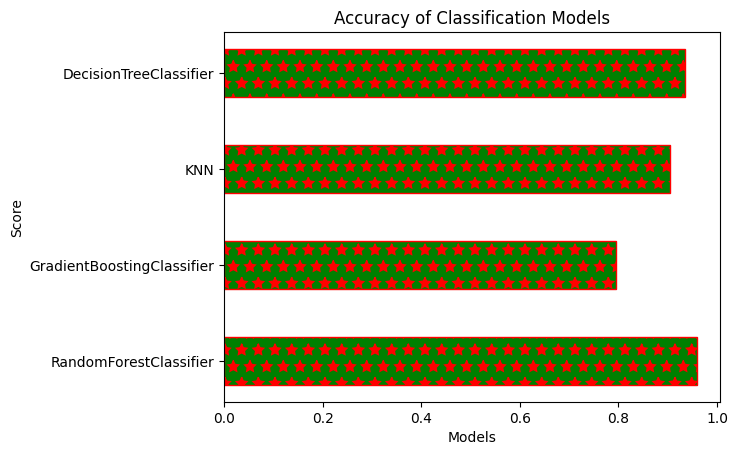

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9583973570989551
GradientBoostingClassifier 0.7940035341118623
KNN 0.9050975722188076
DecisionTreeClassifier 0.9358673939766441

Model: RandomForestClassifier contain Maximum accuracy: 0.9583973570989551 


In [ ]:
models = ['RandomForestClassifier', 'GradientBoostingClassifier', 'KNN', 'DecisionTreeClassifier']
score = [rf_accuracy, gbr_accuracy, knn_accuracy, df_accuracy]

plt.barh(models, score, color='green',height=0.5,hatch='*',edgecolor='red')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy of Classification Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

From this observation we can say that RandomForestClassfier performs well, when compared to other model


In [ ]:
df5.head()

,quantity tons_log,selling_price_log,item type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28,30156308.0,1670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25,30202938.0,1668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30,30153963.0,628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32,30349574.0,1668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28,30211560.0,640665,1


In [ ]:
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 1500.0
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = rfc.predict(new_sample)

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [ ]:
# Saving the model
import pickle
with open('classfier_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [ ]:
df5.to_csv("Copper_Final.csv")

In [ ]:
df5.describe

NameError: name 'df5' is not defined